In [86]:
import numpy as np
from scipy.optimize import linprog
from fractions import Fraction
import random
import matplotlib.pyplot as plt


def nash_equilibrium(B, flag_print=True, flag_return=False):
    A = B.copy()
    '''
    Основная функция, реализующая поиск оптимальных стратегий
    и значения игры
    '''
    matrix_negative_min = find_negative_min(A)
    p = solve(A, 'p') # Решение игры для первого игрока
    q = solve(A, 'q') # Решение игры для второго игрока
    val = 1 / np.sum(p.x)
    
    '''
    Печать в рациональном виде значения игры, необходимо сделать
    обратный сдвиг, чтобы получить значение игры исходной матрицы
    '''
    if flag_print:
        print('\nValue = ', end='')
        print(Fraction(val + matrix_negative_min).limit_denominator())
        print_solution(p, q, val)
        
    if flag_return:
        return (val, p.x, q.x)
    

def print_strategy(strategy):
    '''
    Вспомогательная функция, помогающая организовать
    заявленный в задании вывод     (с использованием
    рациональных дробей)
    '''
    print('| ', end='')
    for i in range(len(strategy)):
        print(Fraction(strategy[i]).limit_denominator(), '| ', end='')


def solve(A, player):
    '''
    Нахождение стратегий с помощью симплекс-метода

    A_ub * x <= b_ub
    '''
    if player is 'p':
        c = np.ones(A.shape[0])
        b = -np.ones(A.shape[1])
        return linprog(c, A_ub=np.transpose(np.negative(make_positive(A))), b_ub=b)
    else:
        c = -np.ones(A.shape[1])
        b = np.ones(A.shape[0])
        return linprog(c, A_ub=make_positive(A), b_ub=b)


def print_solution(solution1, solution2, val):
    '''
    Печать стратегий, графический вывод результата
    '''
    print('\n| p |', end='')
    print_strategy(val * solution1.x)
    print('\n| q |', end='')
    print_strategy(val * solution2.x)
    
    '''
    График для первого игрока
    '''
    fig = plt.figure()
    plt.scatter(range(1, len(solution1.x)+1), val * solution1.x, color='b', s=50, alpha=1)
    plt.title('First player optimal strategy')
    plt.axis((0, None, 0, None)) # Xmin, Xmax, Ymin, Ymax
    plt.grid(axis='x', linestyle='dotted', linewidth=.5) # Оформление координатной сетки
    
    '''
    График для второго игрока
    '''
    fig = plt.figure()
    plt.scatter(range(1, len(solution2.x)+1), val * solution2.x, color='r', s=50, alpha=1)
    plt.title('Second player optimal strategy')
    plt.axis((0, None, 0, None)) # Xmin, Xmax, Ymin, Ymax
    plt.grid(axis='x', linestyle='dotted', linewidth=.5) # Оформление координатной сетки
    
    plt.show() # Выводит графики на экран


def make_positive(A):
    '''
    Сдвиг матрицы на модуль найденного отрицательного минимума
    '''
    A += -find_negative_min(A)
    return A


def find_negative_min(A):
    '''
    Поиск минимального отрицательного элемента матрицы
    '''
    min_val = np.amin(A)
    if min_val <= 0:
        return min_val - 1
    else:
        return 0


def random_matrix(h, w):
    '''
    Генерация случайной матрицы
    '''
    A = np.ones((h, w), dtype=int)
    for i in range(h):
        for j in range(w):
            A[i, j] = random.randint(-10, 10)
    print()
    for i in range(h):
        for j in range(w):
            print(A[i, j], ' ', end='')
        print()
    return A


## Игра из примера


Value = 151/31

| p || 0 | 4/31 | 3/31 | 27/62 | 21/62 | 0 | 
| q || 0 | 0 | 257/372 | 9/62 | 55/372 | 1/62 | 

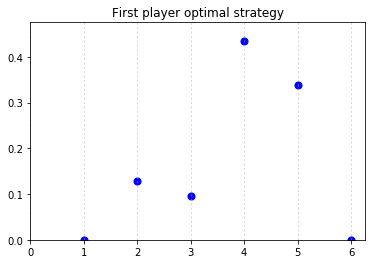

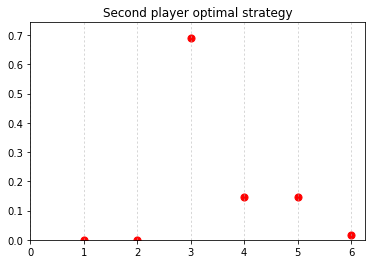

In [87]:
A0 = np.array([[4, 0, 6, 2, 2, 1],
               [3, 8, 4, 10, 4, 4],
               [1, 2, 6, 5, 0, 0],
               [6, 6, 4, 4, 10, 3],
               [10, 4, 6, 4, 0, 9],
               [10, 7, 0, 7, 9, 8]])

nash_equilibrium(A0)

## Cпектр оптимальной стратегии состоит из одной точки


Value = 5

| p || 0 | 1 | 
| q || 0 | 0 | 1 | 0 | 

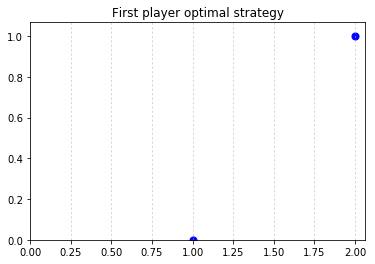

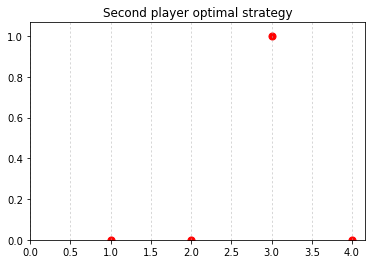

In [88]:
A1 = np.array([[8,7,0,6],
               [6,8,5,10]])

nash_equilibrium(A1)

## Cпектр оптимальной стратегии неполон


Value = 0

| p || 1/3 | 0 | 0 | 0 | 1/3 | 1/3 | 0 | 
| q || 1/3 | 0 | 0 | 0 | 1/3 | 1/3 | 0 | 

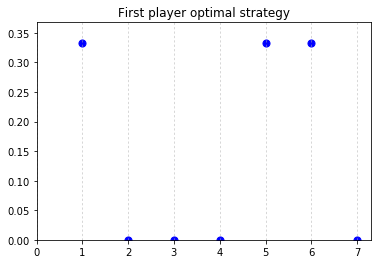

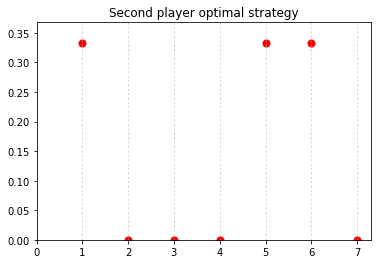

In [89]:
A2 = np.array([[0, 0, 0, 0, 1, -1, 0],
               [0, 0, 1, 0, 0, 0, -1],
               [0, -1, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0, 0],
               [-1, 0, 0, 0, 0, 1, 0],
               [1, 0, 0, 0, -1, 0, 0],
               [0, 1, -1, 0, 0, 0, 0]])

nash_equilibrium(A2)

## Cпектр оптимальной стратегии полон


Value = 0

| p || 1/3 | 1/3 | 1/3 | 
| q || 1/3 | 1/3 | 1/3 | 

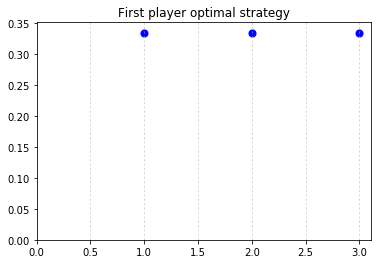

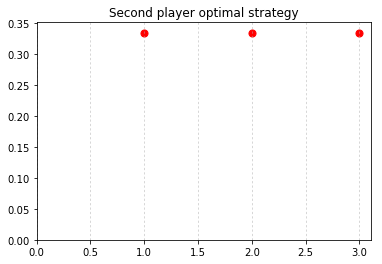

In [90]:
A3 = np.array([[0, 1, -1],
               [-1, 0, 1],
               [1, -1, 0]])

nash_equilibrium(A3)

## Случайная матрица выигрыша


6  -3  -6  -4  10  7  2  -3  -2  0  
10  5  3  5  -1  -7  -4  6  -5  -2  
-6  -6  -5  0  -8  -8  -2  -6  3  -4  
6  -2  -7  -1  3  10  -4  10  5  10  
-1  -4  -1  -7  2  -3  -3  -1  -2  10  
-9  -8  -10  1  2  2  2  -4  2  -6  
-4  -3  -7  2  2  2  7  -8  6  10  
-2  4  3  -5  -6  0  -2  1  3  -6  
-9  9  7  -5  10  1  -7  10  8  9  
2  7  -2  10  -10  -8  -3  -9  -8  10  

Value = -3825/16046

| p || 1535/16046 | 3959/16046 | 0 | 0 | 0 | 0 | 2520/8023 | 2449/16046 | 3063/16046 | 0 | 
| q || 1815/32092 | 0 | 11071/32092 | 4351/32092 | 0 | 1779/8023 | 109/452 | 0 | 0 | 0 | 

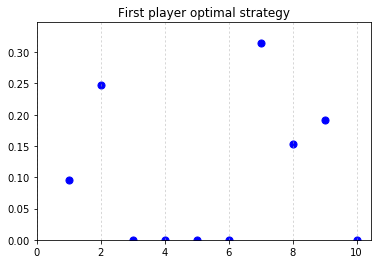

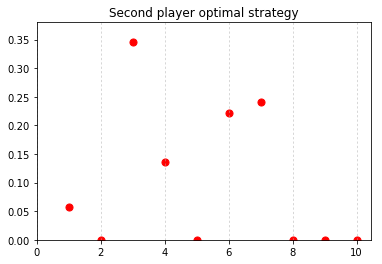

In [91]:
nash_equilibrium(random_matrix(10, 10))

In [92]:
import unittest
from unittest import *

class UnitTest(unittest.TestCase):
    def runTest(self):
        pass

    def test_number1(self):
        A = np.array([[8,7,0,6],
                       [6,8,5,10]])
        p = np.array([0, 1], dtype=np.float)
        q = np.array([0, 0, 1, 0], dtype=np.float)
        val = 5

        a = nash_equilibrium(A, False, True)
        assert(abs(a[0] + find_negative_min(A) - val) < 0.001 )
        assert(np.sum(np.abs(a[1]*a[0] - p)) < 0.001 )
        assert(np.sum(np.abs(a[2]*a[0] - q)) < 0.001 )
        
    def test_number2(self):
        A = np.array([[4, 0, 6, 2, 2, 1],
                       [3, 8, 4, 10, 4, 4],
                       [1, 2, 6, 5, 0, 0],
                       [6, 6, 4, 4, 10, 3],
                       [10, 4, 6, 4, 0, 9],
                       [10, 7, 0, 7, 9, 8]])
        p = np.array([0 , 4/31 , 3/31 , 27/62 , 21/62 , 0], dtype=np.float)
        q = np.array([0 , 0 , 257/372 , 9/62 , 55/372 , 1/62], dtype=np.float)
        val = 151/31

        a = nash_equilibrium(A, False, True)
        assert(abs(a[0] + find_negative_min(A) - val) < 0.001 )
        assert(np.sum(np.abs(a[1]*a[0] - p)) < 0.001 )
        assert(np.sum(np.abs(a[2]*a[0] - q)) < 0.001 )
    
    def test_number3(self):
        A = np.array([[0, 1, -1],
                       [-1, 0, 1],
                       [1, -1, 0]])
        p = np.array([1/3, 1/3, 1/3], dtype=np.float)
        q = np.array([1/3, 1/3, 1/3], dtype=np.float)
        val = 0

        a = nash_equilibrium(A, False, True)
        assert(abs(a[0] + find_negative_min(A) - val) < 0.001 )
        assert(np.sum(np.abs(a[1]*a[0] - p)) < 0.001 )
        assert(np.sum(np.abs(a[2]*a[0] - q)) < 0.001 )
        
    def test_number4(self):
        A = np.array([[0, 0, 0, 0, 1, -1, 0],
                       [0, 0, 1, 0, 0, 0, -1],
                       [0, -1, 0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0, 0, 0],
                       [-1, 0, 0, 0, 0, 1, 0],
                       [1, 0, 0, 0, -1, 0, 0],
                       [0, 1, -1, 0, 0, 0, 0]])
        p = np.array([1/3 , 0 , 0 , 0 , 1/3 , 1/3 , 0], dtype=np.float)
        q = np.array([1/3 , 0 , 0 , 0 , 1/3 , 1/3 , 0], dtype=np.float)
        val = 0

        a = nash_equilibrium(A, False, True)
        assert(abs(a[0] + find_negative_min(A) - val) < 0.001 )
        assert(np.sum(np.abs(a[1]*a[0] - p)) < 0.001 )
        assert(np.sum(np.abs(a[2]*a[0] - q)) < 0.001 )

    
tests = UnitTest()
suite = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.068s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>